In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [4]:

df = pd.read_csv('data/wdbc.data', header = None)

print(df.head())
print(df.info())
print(df.describe())

         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

In [5]:
# view the number of each tumor classification
target_counts = df.iloc[:, 1].value_counts()

print("Number of benign tumors: ", target_counts['B'])
print("Number of malignant tumors: ", target_counts['M'])

Number of benign tumors:  357
Number of malignant tumors:  212


In [6]:
# segment id, target, and feature columns

X = df.iloc[:, 2:]
Y = df.iloc[:, 1]

# Encode binary target column of M and B
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)

In [7]:
# Train/Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size = 0.2, random_state = 1234, stratify = Y_encoded) # maintain class distributions in both the training and test data

# Standardize the numerical features

print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

(455, 30)
(114, 30)


In [8]:
# Baseline SVM 

model = SVC(kernel = 'rbf', random_state = 1234)
model.fit(X_train_scaled, Y_train)

SVC(random_state=1234)

In [9]:
# Evaluate baseline model

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[71  1]
 [ 1 41]]


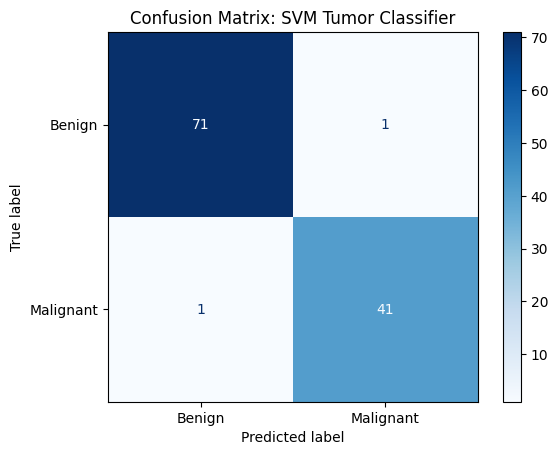

In [10]:
# Display Results as visualizations

class_names = ['Benign', 'Malignant']
cm = confusion_matrix(Y_test, y_pred)

viz = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
viz.plot(cmap = 'Blues')
plt.title("Confusion Matrix: SVM Tumor Classifier")
plt.show()